# MODERN PORTFOLIO THEORY


In [1]:
pip install matplotlib

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
cost=pd.read_csv("C:\\Users\\91995\\OneDrive\\Desktop\\All Files\\Cost SHare price.csv",index_col="Date")['Adj Close']
cost.index=pd.to_datetime(cost.index,dayfirst=True)

In [4]:
wmt=pd.read_csv("C:\\Users\\91995\\OneDrive\\Desktop\\All Files\\WMT price.csv",index_col="Date")['Adj Close']
wmt.index=pd.to_datetime(wmt.index,dayfirst=True)

In [5]:
tgt=pd.read_csv("C:\\Users\\91995\\OneDrive\\Desktop\\All Files\\TGT SHARE PRICE.csv",index_col="Date")['Adj Close']
tgt.index=pd.to_datetime(tgt.index,dayfirst=True)

In [6]:
dg=pd.read_csv("C:\\Users\\91995\\OneDrive\\Desktop\\All Files\\DG Share price.csv",index_col="Date")['Adj Close']
dg.index=pd.to_datetime(dg.index,dayfirst=True)

<Axes: xlabel='Date'>

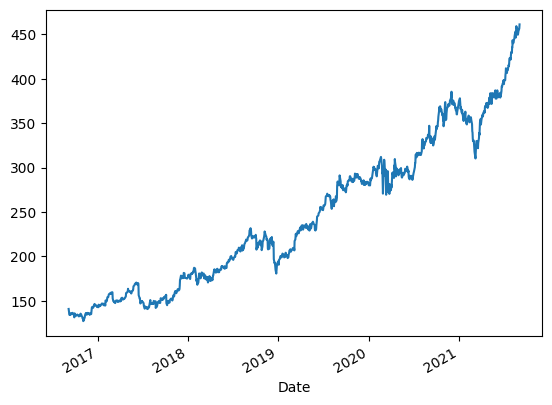

In [7]:
cost.plot()

In [8]:
retail=pd.concat([cost,wmt,tgt,dg],axis=1)
retail.columns=['Cost','WMT',"TGT",'DG']

In [9]:
retail

,Cost,WMT,TGT,DG
Date,,,,
2016-09-06,140.896622,65.758080,60.674061,68.342621
2016-09-07,138.739395,64.911324,60.847187,68.105331
2016-09-08,136.805038,64.704163,60.120117,67.080215
2016-09-09,134.335831,63.325943,59.721989,66.994766
2016-09-12,135.218338,64.803238,59.981625,68.366478
...,...,...,...,...
2021-08-27,450.339996,146.520004,249.179993,225.250000
2021-08-30,455.929993,147.699997,249.360001,225.360001
2021-08-31,455.489990,148.100006,246.979996,222.910004


In [10]:
retail_returns=retail.pct_change(1).dropna()

In [11]:
retail_returns

,Cost,WMT,TGT,DG
Date,,,,
2016-09-07,-0.015311,-0.012877,0.002853,-0.003472
2016-09-08,-0.013942,-0.003191,-0.011949,-0.015052
2016-09-09,-0.018049,-0.021300,-0.006622,-0.001274
2016-09-12,0.006569,0.023328,0.004347,0.020475
2016-09-13,-0.006263,-0.006672,-0.005195,-0.019368
...,...,...,...,...
2021-08-27,0.002292,-0.005633,0.000884,-0.002877
2021-08-30,0.012413,0.008053,0.000722,0.000488
2021-08-31,-0.000965,0.002708,-0.009544,-0.010871


<Axes: xlabel='Date'>

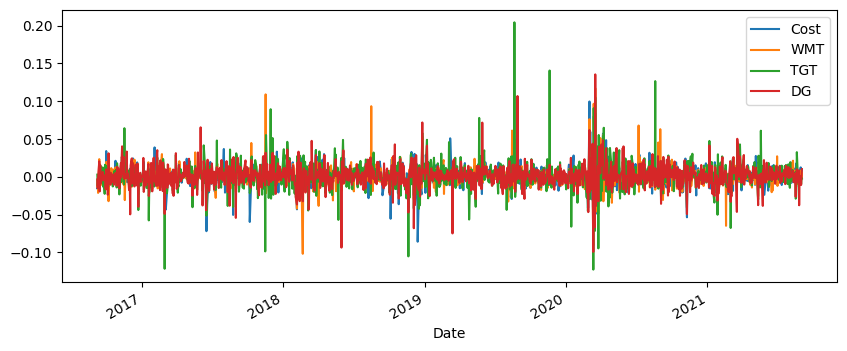

In [12]:
retail_returns.plot(figsize=(10,4))

<Axes: ylabel='Frequency'>

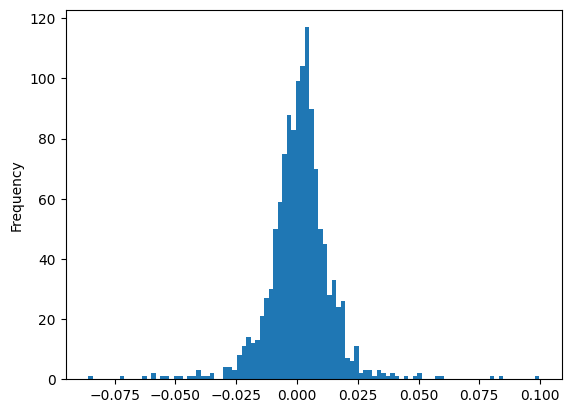

In [13]:
retail_returns['Cost'].plot(kind='hist',bins=100)

<Axes: xlabel='Date'>

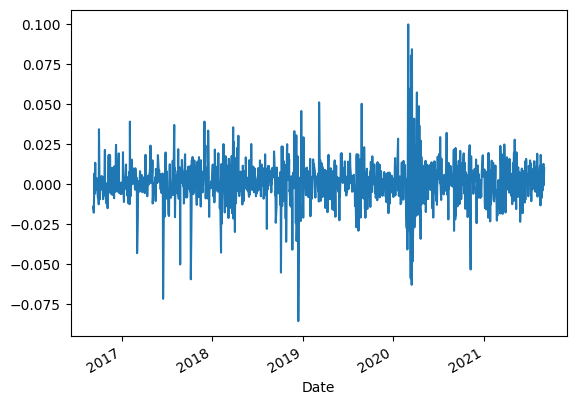

In [14]:
retail_returns["Cost"].plot()

In [15]:
cum_ret=(1+retail_returns["Cost"]).cumprod() -1

In [16]:
cum_perc=100*cum_ret

<Axes: xlabel='Date'>

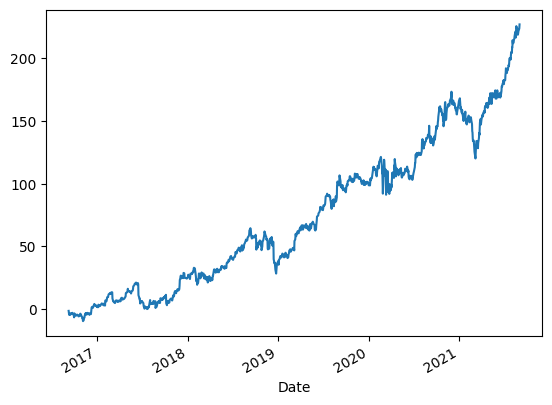

In [17]:
cum_perc.plot()

In [18]:
np.dot([2,3],[4,10])

38

In [19]:
2*4 + 3*10

38

In [20]:
example_return=np.array([1,0.5]) # 100% 50 %
weights=[0.5,0.5] #cash go in percent ? 100% 0%

In [21]:
np.dot(weights,example_return)

0.75

In [22]:
np.dot([0.5,0,0.25,0.25],retail_returns.transpose())

array([-0.00781003, -0.01372145, -0.01099856, ..., -0.00558652,
        0.00026645,  0.00685398])

In [23]:
n=len(retail_returns.columns)

In [24]:
n

4

In [25]:
equal_weight= n * [1/n]

In [26]:
equal_weight

[0.25, 0.25, 0.25, 0.25]

In [27]:
# 3*[4]

In [28]:
equal_return=np.dot(equal_weight,retail_returns.transpose())

In [29]:
equal_return

array([-0.00720156, -0.01103371, -0.01181137, ..., -0.00466819,
       -0.00083906,  0.00573659])

In [30]:
cum_equal_weighted_returns=(1+equal_return).cumprod()-1

In [31]:
cum_equal_weighted_returns_perc=100*cum_equal_weighted_returns

In [32]:
cewrp=pd.Series(cum_equal_weighted_returns_perc,index=retail_returns.index)

In [33]:
cewrp

Date
2016-09-07     -0.720156
2016-09-08     -1.815581
2016-09-09     -2.975273
2016-09-12     -1.647971
2016-09-13     -2.569954
                 ...    
2021-08-27    232.170295
2021-08-30    233.970413
2021-08-31    232.411376
2021-09-01    232.132463
2021-09-02    234.037771
Length: 1257, dtype: float64

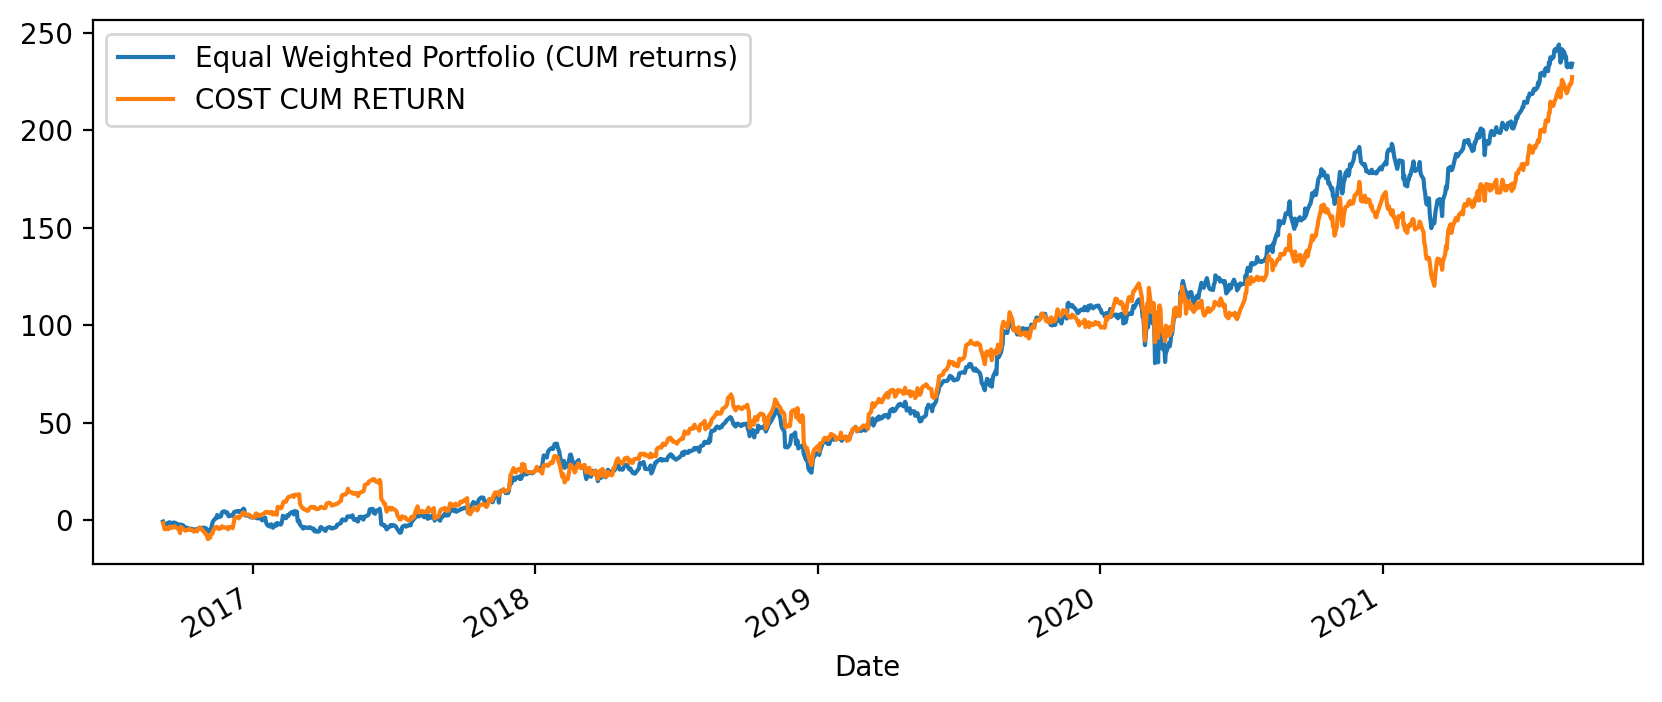

In [34]:
plt.figure(figsize=(10,4),dpi=200)
cewrp.plot(label="Equal Weighted Portfolio (CUM returns)")
cum_perc.plot(label="COST CUM RETURN")
plt.legend()



# MONTE CARLO SIMULATION


In [35]:
retail


,Cost,WMT,TGT,DG
Date,,,,
2016-09-06,140.896622,65.758080,60.674061,68.342621
2016-09-07,138.739395,64.911324,60.847187,68.105331
2016-09-08,136.805038,64.704163,60.120117,67.080215
2016-09-09,134.335831,63.325943,59.721989,66.994766
2016-09-12,135.218338,64.803238,59.981625,68.366478
...,...,...,...,...
2021-08-27,450.339996,146.520004,249.179993,225.250000
2021-08-30,455.929993,147.699997,249.360001,225.360001
2021-08-31,455.489990,148.100006,246.979996,222.910004


In [36]:
log_ret=np.log(retail/retail.shift(1))

In [37]:
# log_ret
# retail_returns # log returns and normal return almost same

,Cost,WMT,TGT,DG
Date,,,,
2016-09-06,NaN,NaN,NaN,NaN
2016-09-07,-0.015429,-0.012960,0.002849,-0.003478
2016-09-08,-0.014040,-0.003197,-0.012021,-0.015166
2016-09-09,-0.018214,-0.021530,-0.006644,-0.001275
2016-09-12,0.006548,0.023060,0.004338,0.020268
...,...,...,...,...
2021-08-27,0.002290,-0.005649,0.000883,-0.002882
2021-08-30,0.012336,0.008021,0.000722,0.000488
2021-08-31,-0.000966,0.002705,-0.009590,-0.010931


In [40]:
N=len(retail.columns)

In [44]:
weights=np.random.random(N)

In [48]:
x=weights/np.sum(weights) # holding == 1 (in percentage)

In [55]:
# np.sum(x)
def gen_weight(N):
    weights=np.random.random(N)
    return weights/np.sum(weights)

In [56]:
gen_weight(4)

array([0.44071399, 0.14993433, 0.02719992, 0.38215176])

In [57]:
def calculate_ret(weights,log_ret):
    return np.sum(log_ret.mean()*weights)*252

In [58]:
log_ret.cov()

,Cost,WMT,TGT,DG
Cost,0.000176,0.000107,0.000120,0.000104
WMT,0.000107,0.000187,0.000121,0.000108
TGT,0.000120,0.000121,0.000370,0.000170
DG,0.000104,0.000108,0.000170,0.000248


In [68]:
def calculate_volatility(weights,log_ret_cov):
    annualized_cov=np.dot(log_ret_cov*252,weights)
    vol=np.dot(weights.transpose(),annualized_cov)
    return np.sqrt(vol)

In [69]:
calculate_volatility(weights,log_ret.cov())

0.589571972459299

In [70]:
log_ret=np.log(retail/retail.shift(1))
log_ret_cov=log_ret.cov()


In [71]:
mc_portfolio_returns=[]
mc_portfolio_volatilty=[]
mc_weights=[]

for sim in range(3000):
    weights=gen_weight(N=4)
    mc_weights.append(weights)
    sim_return=calculate_ret(weights,log_ret)
    mc_portfolio_returns.append(sim_return)
    sim_vol=calculate_volatility(weights,log_ret_cov)
    mc_portfolio_volatilty.append(sim_vol)
    



In [72]:
len(mc_portfolio_returns)

3000

In [73]:
mc_sharpe_ratio=np.array(mc_portfolio_returns)/np.array(mc_portfolio_volatilty)

Text(0, 0.5, 'Return')

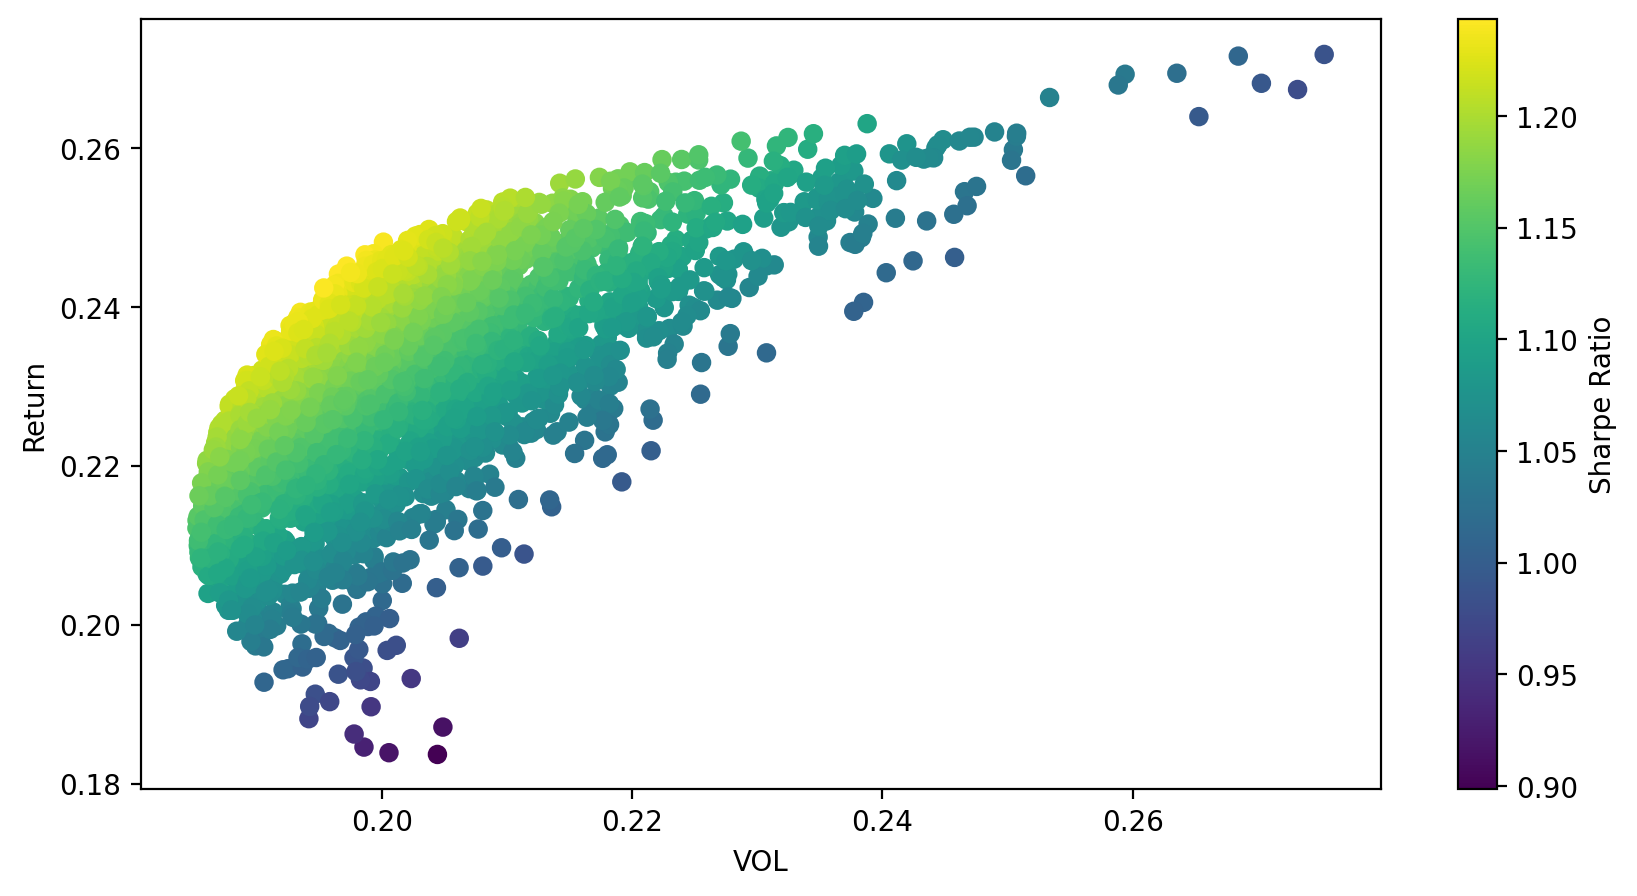

In [77]:
plt.figure(figsize=(10,5),dpi=200)
plt.scatter(mc_portfolio_volatilty,mc_portfolio_returns,c=mc_sharpe_ratio)
plt.colorbar(label='Sharpe Ratio')
plt.xlabel("VOL")
plt.ylabel("Return")

In [78]:
np.argmax(mc_sharpe_ratio)

1389

In [80]:
mc_weights[1389]

array([0.61384802, 0.00817662, 0.18428326, 0.1936921 ])

# MINIMIZATION WITH SCIPY

In [81]:
from scipy.optimize import minimize

In [82]:
def function_to_minimize(weights):
    #MINIMIZE A 1*SR
    return -1*(calculate_ret(weights,log_ret))/(calculate_volatility(weights,log_ret_cov))

In [83]:
((0,1),(0,1),(0,1))

((0, 1), (0, 1), (0, 1))

In [85]:
bound=tuple((0,1) for n in range (N))

In [86]:
bound

((0, 1), (0, 1), (0, 1), (0, 1))

In [93]:
sum_constraints=({'type':'eq','fun':lambda weights:np.sum(weights)-1})

In [94]:
equal_weight

[0.25, 0.25, 0.25, 0.25]

In [98]:
minimize(fun=function_to_minimize,x0=equal_weight,bounds=bound,constraints=sum_constraints)

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: -1.2451267776065353
       x: [ 5.846e-01  0.000e+00  1.768e-01  2.386e-01]
     nit: 4
     jac: [-3.517e-04  5.834e-02  1.120e-03  3.202e-05]
    nfev: 20
    njev: 4

<Axes: xlabel='Date'>

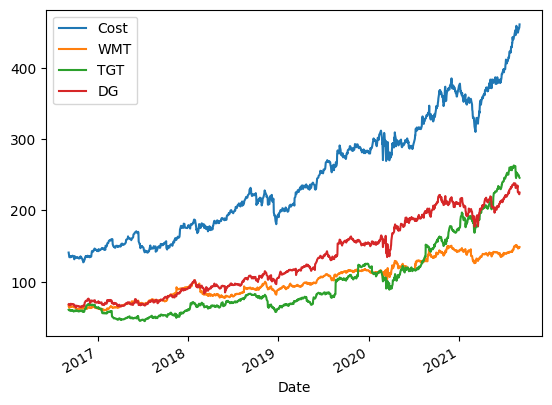

In [97]:
retail.plot()

# EFFICIENT FRONTIER

In [100]:
expected_returns=np.linspace(0.18,0.28,100)

In [101]:
expected_returns

array([0.18      , 0.1810101 , 0.1820202 , 0.1830303 , 0.1840404 ,
       0.18505051, 0.18606061, 0.18707071, 0.18808081, 0.18909091,
       0.19010101, 0.19111111, 0.19212121, 0.19313131, 0.19414141,
       0.19515152, 0.19616162, 0.19717172, 0.19818182, 0.19919192,
       0.20020202, 0.20121212, 0.20222222, 0.20323232, 0.20424242,
       0.20525253, 0.20626263, 0.20727273, 0.20828283, 0.20929293,
       0.21030303, 0.21131313, 0.21232323, 0.21333333, 0.21434343,
       0.21535354, 0.21636364, 0.21737374, 0.21838384, 0.21939394,
       0.22040404, 0.22141414, 0.22242424, 0.22343434, 0.22444444,
       0.22545455, 0.22646465, 0.22747475, 0.22848485, 0.22949495,
       0.23050505, 0.23151515, 0.23252525, 0.23353535, 0.23454545,
       0.23555556, 0.23656566, 0.23757576, 0.23858586, 0.23959596,
       0.24060606, 0.24161616, 0.24262626, 0.24363636, 0.24464646,
       0.24565657, 0.24666667, 0.24767677, 0.24868687, 0.24969697,
       0.25070707, 0.25171717, 0.25272727, 0.25373737, 0.25474

In [115]:
constraints=({'type':'eq','fun':lambda weights:np.sum(weights)-1},
{'type':'eq','fun':lambda weights:calculate_ret(weights,log_ret)-possible_return})

In [116]:
def calculate_volatility(weights):
    annualized_cov=np.dot(log_ret_cov*252,weights)
    vol=np.dot(weights.transpose(),annualized_cov)
    return np.sqrt(vol)

In [117]:
frontier_vol=[]
portfolio_holding=[]

for possible_return in expected_returns:
    result=minimize(calculate_volatility,equal_weight,bounds=bound,constraints=constraints)
    #VOLATILITY FOR RETURN
    frontier_vol.append(result['fun'])
    portfolio_holding.append(result['x'])


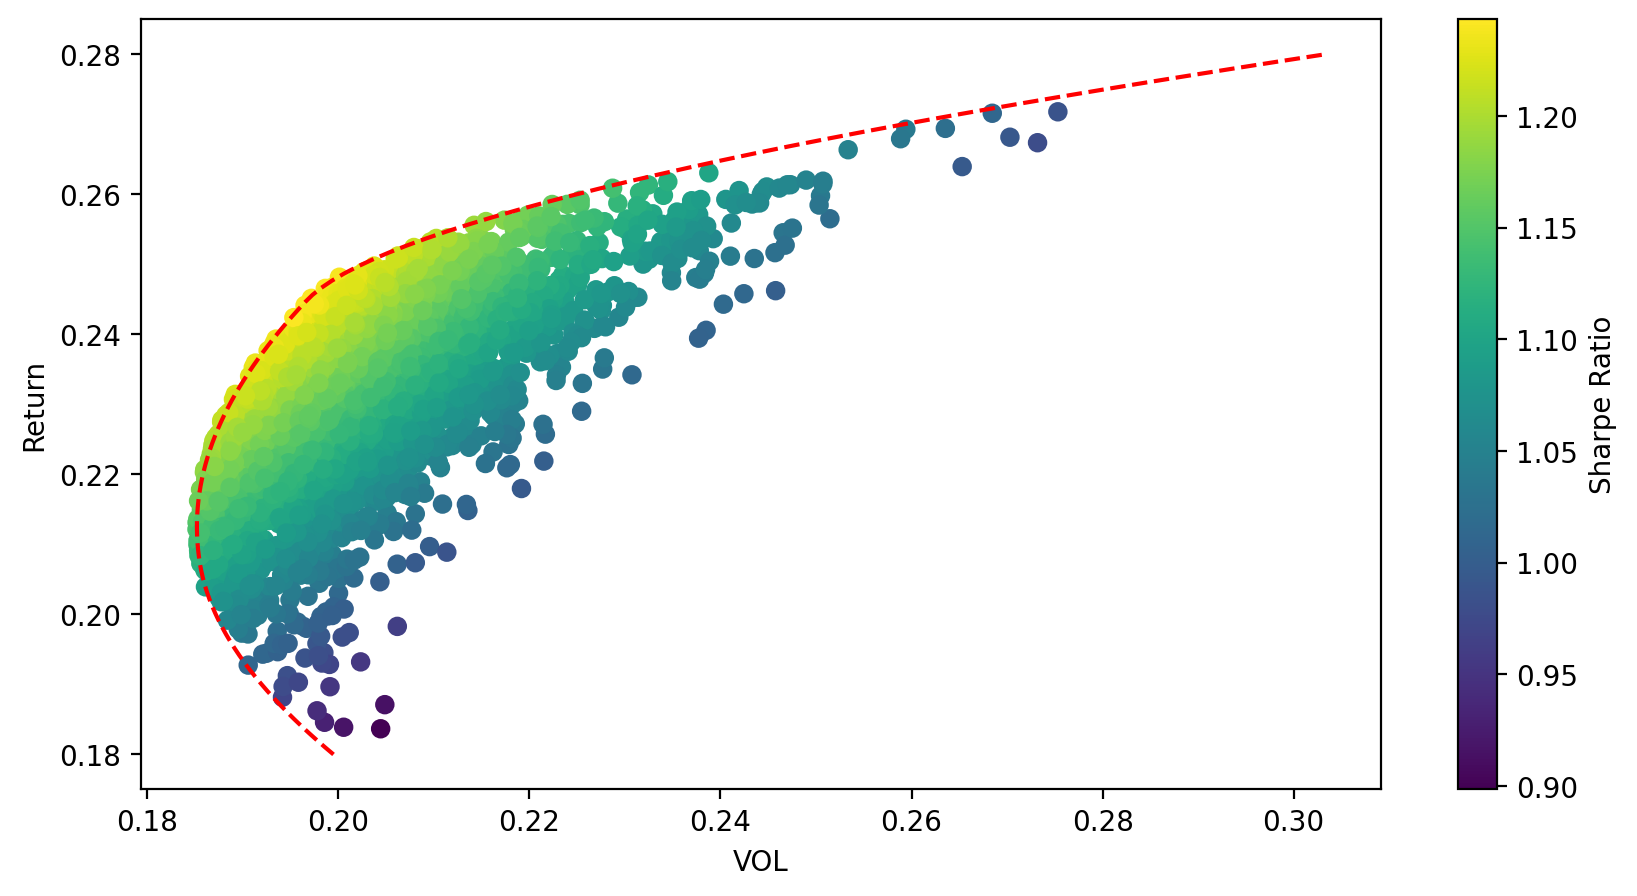

In [118]:
plt.figure(figsize=(10,5),dpi=200)
plt.scatter(mc_portfolio_volatilty,mc_portfolio_returns,c=mc_sharpe_ratio)
plt.colorbar(label='Sharpe Ratio')
plt.xlabel("VOL")
plt.ylabel("Return")

plt.plot(frontier_vol,expected_returns,color='red',ls='--')

In [119]:
portfolio_holding[0]

array([1.53553171e-01, 7.77394698e-01, 7.58941521e-18, 6.90521311e-02])

In [120]:
frontier_vol=np.array(frontier_vol)

In [121]:
np.where(frontier_vol>0.24)

(array([84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99],
       dtype=int64),)

In [122]:
portfolio_holding[85]

array([3.41143397e-01, 0.00000000e+00, 6.58856603e-01, 1.38777878e-17])

In [125]:
frontier_vol[84]

0.24006958157593636

In [127]:
expected_returns[84]

0.2648484848484849